<a href="https://colab.research.google.com/github/codegithubka/Physics-4AL-Gooogle-Collab-Files/blob/main/Simple_harmonic_motion_in_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Least squares fitting

One way to analyze this system is by obtaining a function that fits the data. We know that simple harmonic motion has a sinusoidal profile so we will try to fit the best fit sinusoidal function. This is not as simple as using the np.polyfit but this will give you an idea of what goes behind the scenes of np.polyfit

We plot our ultrasound data again as a start. We'll use the[ example data](https://drive.google.com/open?id=1mRAl6J92CvmfPjvzcUuCasVbSuXsWL5i) from the pre-lab, but you will be expected to do this procedure on your own data for the lab report.

In [ ]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at drive


In [ ]:
# numpy has a function that helps to read data files so we import it
import numpy as np
import matplotlib.pyplot as plt

# Read in data using np.loadtxt. It takes in two inputs, the path to the file and a delimiter. The delimiter in this case is ',' since it is a csv file.
# We used skiprows = 1 to skip the first row of the csv file which contained the column headers and the units. 
# Your data should have five columns - elapsed time, acceleration in x direction, acceleration in y direction, acceleration in z direction, ultrasound distance
read_in_array = np.loadtxt('/content/drive/My Drive/Student Resources/Lab Instructions 4A Lab/Lab 3B/testOscillation1.csv',skiprows=1,delimiter=',')

In [ ]:
# This dataset has five columns
# Take all of the elements in the 0th column to create your x-axis array
x_axis = read_in_array[:,0]
# Elapsed time is typically always going to be the x-axis
# We are converting it from units of ms to s.
elapsed_time = (x_axis-x_axis[0])/1000.

# We create an array to store the acceleration in x - the axis along which simple harmonic motion takes place
acc_data_unrefined = read_in_array[:,1]

# The units are cm/s^2, we are converting it to m/s^2.
# The data is collected from a vertical spring mass system.
# We add 9.8 to the array to centre the acceleration around 0 since the smaller mass in the accelerometer always experiences -g. 
acc_data = (acc_data_unrefined/100.)+9.8

# We create an array to store the ultrasound sensor data - this value is in mm, so we convert the unit to m.
ultrasound_unrefined = read_in_array[:,4]
ultrasound = ultrasound_unrefined/1000.

Text(0.5, 0, 'Time (s)')

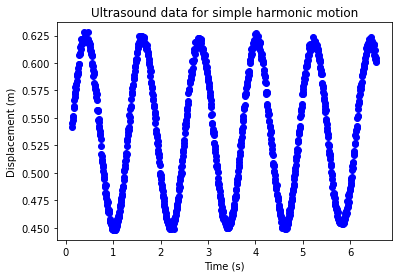

In [ ]:
start_time = 20

# Starting the array from the 20th element instead of 0
ultrasound_window = ultrasound[start_time:1000]
elapsed_time_window = elapsed_time[start_time:1000]

# Create a scatter plot
plt.scatter(elapsed_time_window,ultrasound_window,color="blue")

# Provide a title to the plot
plt.title('Ultrasound data for simple harmonic motion')

# Label the y-axis
plt.ylabel('Displacement (m)')

# Label the x-axis
plt.xlabel('Time (s)')

The first thing we will do is try to approximately guess from the plot, the critical values to a sine function. These are the amplitude of osciallation, the frequency, the offset and the phase. We will rely on scipy.optimize module's least_squares function. 

In [ ]:
from scipy.optimize import least_squares

# Make reasonable guesses for parameters like amplitude, omega, offset and phi based on the plot above 
guess_amplitude = 0.1 
guess_omega = 5
guess_offset = 0.55
guess_phi = 0

# Store all the guessed parameters in an array
guess_parameters = [guess_amplitude, guess_omega, guess_offset, guess_phi]

We define a function that can generate a sine wave based on the four parameters in consideration. Remember that functions take in inputs and return a result.

In [ ]:
def sin_fit_fun(parameters, time):
  a = parameters[0]
  omega = parameters[1]
  offset = parameters[2]
  phi = parameters[3]
  y = a * np.sin(omega * time + phi) + offset
  return y

We define another function called get_residuals. The purpose of this function is to take in the following inputs - the original data and the parameters for the guessed function. This function will then provide us with residuals or the differences between the observed and predicted values.

In [ ]:
def get_residuals(parameters, data, x):
  residuals = np.abs(data - sin_fit_fun(parameters, x))
  return -residuals

Plot the guessed function with initial guesses vs the original data.

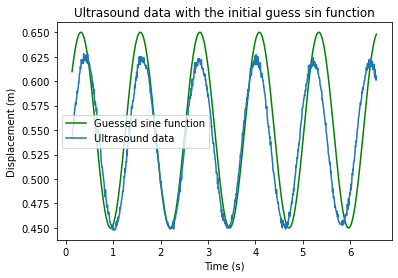

In [ ]:
# Create a sin function based on original guess parameters
theoretical_guess_function = sin_fit_fun(guess_parameters, elapsed_time_window)

# Plot the guess function
plt.plot(elapsed_time_window, theoretical_guess_function,color="green",label="Guessed sine function")

# Plot the original data
plt.plot(elapsed_time_window, ultrasound_window, label="Ultrasound data")

plt.xlabel("Time (s)")
plt.ylabel("Displacement (m)")
plt.title("Ultrasound data with the initial guess sin function")
plt.legend()

Now we will use the least squares function to minimize the residuals obtained. This will ensure that out best fit function is very close to the original data.

In [ ]:
# The imported least_squares function minimizes the residuals
res_lsq = least_squares(get_residuals, guess_parameters, 
args=(ultrasound_window,elapsed_time_window))

# We store the values of best possible paremeters obtained for amplitude, omega, offset and phase in best_parameters
best_parameters = res_lsq['x']

In [ ]:
res_lsq = least_squares(get_residuals, guess_parameters, 
                        args=(ultrasound_window,elapsed_time_window))

best_parameters = res_lsq['x']

# Print the values of the best parameters
print('Best Amplitude: ' + str(best_parameters[0]))
print('Best Omega: ' + str(best_parameters[1]))
print('Best offset: ' + str(best_parameters[2]))
print('Best Phi: ' + str(best_parameters[3]))

We will now plot the best fit sin function based on the parameters obtained using the least squares function.

Best Amplitude: 0.08534514412738414
Best Omega: 5.223399414153791
Best offset: 0.5362215105739305
Best Phi: -0.5705371665105196


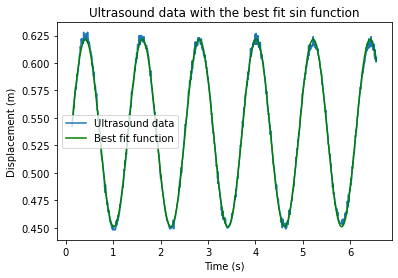

In [ ]:
# The best fit sin function will have the best_parameters as an input to the sin function that we created
fitted_function = sin_fit_fun(best_parameters, elapsed_time_window)

# Plot the original data and the best fit function on the same plot
plt.plot(elapsed_time_window, ultrasound_window,label="Ultrasound data")
plt.plot(elapsed_time_window, fitted_function, color = 'green', label="Best fit function")
plt.xlabel("Time (s)")
plt.ylabel("Displacement (m)")
plt.legend()
plt.title("Ultrasound data with the best fit sin function")

# Print the values of the best parameters
print('Best Amplitude: ' + str(best_parameters[0]))
print('Best Omega: ' + str(best_parameters[1]))
print('Best offset: ' + str(best_parameters[2]))
print('Best Phi: ' + str(best_parameters[3]))

We now have the best fit function to our data. Remember that this works only for a small portion of our data. Our data shows damping in the long run. However, in a smaller time frame, we can use this best fit function to verify if our accelerometer readings agree with us. The function that we obtained finds the position x at any time t. This function x(t) can be differentiated once to get velocity and differentiated again to get acceleration. 

In [ ]:
# The differentiation can be done by hand and then typed into code
# vel_fit is the velocity as a function of time
vel_fit = best_parameters[0]*best_parameters[1]*np.cos(best_parameters[1]*elapsed_time_window+best_parameters[3])

# acc_fit is the acceleration as a function of time
acc_fit = -best_parameters[0]*(best_parameters[1]**2)*np.sin(best_parameters[1]*elapsed_time_window+best_parameters[3])

[Optional] Plot the acceleration plot from the best fit sin function and compare it with the accelerometer data. What are the differences that you obtain? 

In [ ]:
# Create a scatter plot - elapsed time VS accelerometer data

# Create a plot - elapsed time VS acceleration obtained from best fit positions data

# Provide a title to the plot

# Label the x axis

# Label the y axis

# Proivde legends

# Your analysis

Plot and fit your own data below 

In [ ]:
# Read in your time and position data
# Read in your time and position data
arr = np.loadtxt('/content/gdrive/MyDrive/Tran, Tommy/assets/3A_osci2.txt', delimiter=',')
time = (arr[:,0] - arr[:,0][0]) / 1000 # make it elapsed time and convert ms to s
pos = arr[:,1] / 100 # convert cm to m




Below are the functions you need for the fit

In [ ]:
def sin_fit_fun(parameters, time):
  a = parameters[0]
  omega = parameters[1]
  offset = parameters[2]
  phi = parameters[3]
  y = a * np.sin(omega * time + phi) + offset
  return y

Plot your time vs position data

In [ ]:
# Make a plot
plt.plot(time, pos, label='Cycles of Harmonic Oscillation') 

# Axis labels
plt.xlabel('Time (s)')
plt.ylabel('Distance (m)')

# Title
plt.title('Distance vs Time')
plt.legend()




Clip your data so that the phase is 0

In [ ]:
# Plot against indices
plt.plot(pos, label='Cycles of Harmonic Oscillation') 
# Axis labels
plt.xlabel('Index')
plt.ylabel('Distance (m)')

# Title
plt.title('Distance vs Index')
plt.legend()


# define your starting time
start_ind = 0
end_ind = 0
# Clip your data
time_window = time[start_ind:end_ind]
pos_window = pos[start_ind:end_ind]


# Make a plot
plt.plot(time_window, pos_window, label='Cycles of Harmonic Oscillation') 
plt.xlabel('Elapsed Time (s)')
plt.ylabel('Distance (m)')
plt.title('Distance vs Elapsed Time')
plt.legend()


In [ ]:
# Make your guess parameters 

# Guess a
a = np.max(pos_window) - (np.max(pos_window) + np.min(pos_window)) / 2
# guess omega
period = (time_window[-1] - time_window[0]) / 3
omega = 2 * np.pi / period
offset = (np.max(pos_window) + np.min(pos_window)) / 2
phi = 0



In [ ]:
# Guess plot vs real plot
guess_params = [a, omega, offset, phi]
plt.plot(time_window, pos_window, label='Cycles of Harmonic Oscillation') 
plt.plot(time_window, sin_fit_fun(guess_params, time_window), label='Best-fit Sine Curve')
plt.xlabel('Elapsed Time (s)')
plt.ylabel('Distance (m)')
plt.title('Distance vs Elapsed Time')
plt.legend()

In [ ]:
# Perform least squares
res_lsq = least_squares(get_residuals, guess_params, 
args=(pos_window,time_window))

# We store the values of best possible paremeters obtained for amplitude, omega, offset and phase in best_parameters
best_params = res_lsq['x']



In [ ]:
# Print out best parameters
print(f"""
Best amplitude: {best_params[0]}
Best omega: {best_params[1]}
Best offset: {best_params[2]}
Best phi: {best_params[3]}
""")



In [ ]:
# Plot the data
plt.plot(time_window, pos_window, label='Position Data')

# Plot the fit
fitted_func = sin_fit_fun(best_params, time_window)
plt.plot(time_window, fitted_func, label='Best-fit Sine Curve for Position')



# Legend
plt.legend()
# axis labels
plt.xlabel('Elapsed Time (s)')
plt.ylabel('Distance (m)')
#title
plt.title('Distance vs Elasped Time')



In [ ]:
calculated_omega = np.sqrt(k/m) #FIXME:
print(f"""
Best-fit omega: {best_params[1]}
Calculated omega: {calculated_omega}       
 """)

In [ ]:
x_analog = arr[:,2]

# Calibration
xdata = np.loadtxt('#FIXME', delimiter=',')
zdata = np.loadtxt('#FIXME', delimiter=',')

zaxis_xmean = np.mean(zdata[:,2])
xaxis_xmean = np.mean(xdata[:,2])

"""
Returns (slope, intercept)
(x1,y1) = (analog value for zero accel from other axis, acceleration = 0 m/s²)
(x2,y2) = (analog value for -1g reading, acceleration for gravity = -9.81 m/s²)

"""
def calibration_curve(x1,y1,x2,y2):
    slope = (y2-y1)/(x2-x1)
    intercept = y1 - slope * x1
    return (slope, intercept)

x = [zaxis_xmean, xaxis_xmean]
y = [0, -9.81]
slope, intercept = calibration_curve(zaxis_xmean, 0, xaxis_xmean, -9.81)
accel = x_analog * slope + intercept
relative_accel = accel + 9.8
relative_accel_window = relative_accel[start_ind:end_ind]

In [ ]:
res_lsq_accel = least_squares(get_residuals, guess_params, args=(relative_accel_window, time_window))
best_params_accel = res_lsq_accel['x']
fitted_func_accel = sin_fit_fun(best_params_accel, time_window)

In [ ]:
# The differentiation can be done by hand and then typed into code
# vel_fit is the velocity as a function of time
vel_fit = best_params[0]*best_params[1]*np.cos(best_params[1]*time_window+best_params[3])

# acc_fit is the acceleration as a function of time
acc_fit = best_params[0]*(best_params[1]**2)*np.sin(best_params[1]*time_window+best_params[3]) #

In [ ]:
plt.plot(time_window, relative_accel_window, label='Acceleration Data')
plt.plot(time_window, fitted_func_accel, label='Best-fit Sine Curve for Acceleration')
plt.plot(time_window, acc_fit, label='Double Derivative of Position Function from Best Params for Pos Fitting')
plt.xlabel('Elapsed Time (s)')
plt.ylabel('Relative Acceleration (m/s^2)')
plt.title('Relative Acceleration vs Elapsed Time')
plt.legend()